In [3]:
import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

In [4]:
# Create driver
driver = webdriver.Chrome(ChromeDriverManager().install())

In [5]:
# Go the the characters in stories page
page_url = 'https://witcher.fandom.com/wiki/Category:Characters_in_the_stories'
driver.get(page_url)

# Give some time for the webpage to load
time.sleep(3)

# Find the books
book_categories = driver.find_elements_by_class_name('category-page__member-link')

books = []

for category in book_categories:
    book_url = category.get_attribute('href')
    book_name = category.text
    books.append({'book_name': book_name, 'url': book_url})

In [6]:
books

[{'book_name': 'Category:Baptism of Fire characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'},
 {'book_name': 'Category:Blood of Elves characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Blood_of_Elves_characters'},
 {'book_name': "Godamba Thaess'en",
  'url': 'https://witcher.fandom.com/wiki/Godamba_Thaess%27en'},
 {'book_name': 'Category:Season of Storms characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Season_of_Storms_characters'},
 {'book_name': 'Category:Something Ends, Something Begins characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Something_Ends,_Something_Begins_characters'},
 {'book_name': 'Category:Sword of Destiny characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Sword_of_Destiny_characters'},
 {'book_name': 'Category:Szpony i kły characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Szpony_i_k%C5%82y_characters'},
 {'book_name': 'Category:Tales from the world of The W

In [7]:
characters = []

for book in books:
    driver.get(book['url'])

    character_elems = driver.find_elements_by_class_name('category-page__member-link')

    for elem in character_elems:
        characters.append({'book': book['book_name'], 'character': elem.text})

In [8]:
df = pd.DataFrame(characters)

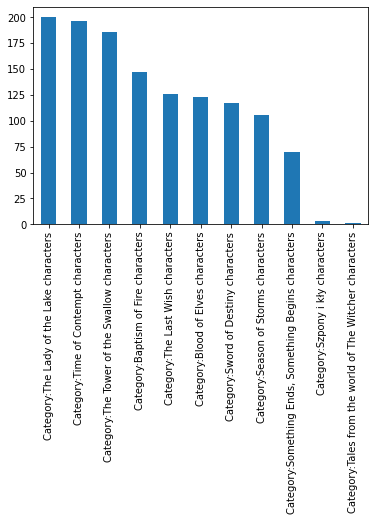

In [9]:
import matplotlib.pyplot as plt 

character_df = pd.DataFrame(characters)

character_df['book'].value_counts().plot(kind = 'bar')
plt.show()

In [10]:
with open('characters.csv', 'w') as csv_file:
    df.to_csv(index = False, path_or_buf = csv_file)